In [2]:
import os
import csv
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#csv file path
path='/content/drive/My Drive/Colab Notebooks/security/data'
fullpath1=os.path.join(path, 'total.csv')
# 8:2=train:test
dataset = pd.read_csv(fullpath1)
#dataset= dataset.dropna(axis=0)
dataset = dataset.replace([np.inf, -np.inf],1)
dataset = dataset.replace([np.nan],0)
x_data=dataset.iloc[:,:-1]
y_data=dataset.iloc[:,[-1]]
del x_data['Dst Port']
del x_data['Timestamp']

#x_data = x_data.astype(np.float32)
#np.any(np.isnan(x_data))
#np.all(np.isfinite(x_data))
#8:2=train:test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
x_train.dtypes

sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
#training
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
#predict
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))
 
# check accuracy
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


['Benign' 'FTP-BruteForce' 'Benign' ... 'Bot' 'Bot' 'DDOS attack-HOIC']
['Label']
정확도 : 0.8949308572111744


In [4]:
pip install pyod

  Using cached https://files.pythonhosted.org/packages/2b/1d/22a6c4e796fff1066bf80bf59b4494d6e3582e22012a61721f4cb730b3c3/pyod-0.8.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/0a/2a/61b6ac584e75d8df16dc27962aa5fe99d76b09da5b6710e83d4862c84001/combo-0.1.1.tar.gz
     |████████████████████████████████| 2.1MB 9.2MB/s 
  Created wheel for pyod: filename=pyod-0.8.4-cp36-none-any.whl size=112082 sha256=70ca1acd44200adbf3e0b742c1e95875cf91175e749056d00dc81aa60405478d
  Stored in directory: /root/.cache/pip/wheels/ad/31/0a/c2d4ba2d066145c55f0cb2846e59b18d874cb59c5d9adc81cf
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=1ca1a7ecbecaebb6ff7462961c618ea83f4ebcdb0cb5766653ffdda58d71176d
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=1c5f1086e2ad8dcb2ecb772e61c69fd9226ebc1302d0ea84a2a956aa0e0a78a4
  St

       Protocol  Flow Duration  Tot Fwd Pkts  ...  Idle Max  Idle Min  anomaly
36356         6        1671632             8  ...         0         0        1
32892        17         111308             2  ...         0         0        1
42039         6         791613             5  ...         0         0        1
38383         6         299209             3  ...         0         0        1
38032         6         206382             3  ...         0         0        1
...         ...            ...           ...  ...       ...       ...      ...
25855         6        2431430             8  ...         0         0        1
13678         6        1391804             8  ...         0         0        1
16566         6        1973905             8  ...         0         0        1
13621         6        1398043             8  ...         0         0        1
3186          6        2076454             8  ...         0         0        1

[10044 rows x 78 columns]
 1    9999
-1      45
Nam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


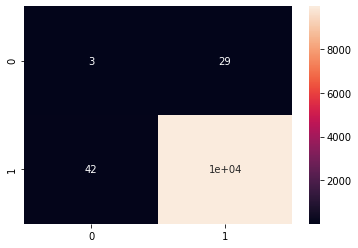

In [5]:
from __future__ import division
from __future__ import print_function

import os
import sys
import csv
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import IsolationForest
from sklearn import metrics 
from sklearn.ensemble import IsolationForest



from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

path='/content/drive/My Drive/Colab Notebooks/security/data'
fullpath2=os.path.join(path, 'AnomalyDetect_train.csv')

dataset2 = pd.read_csv(fullpath2)
dataset2 = dataset2.replace([np.inf, -np.inf],1)
dataset2 = dataset2.replace([np.nan],0)
X_data=dataset2.iloc[:,:-1]
Y_data=dataset2.iloc[:,[-1]]
del X_data['Dst Port']
del X_data['Timestamp']


# Generate sample data
# 8:2=train:test
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)

# 0.04%의 outlier 색출.
clf=IsolationForest(n_estimators=50, max_samples=10000, contamination=float(0.004),max_features=1.0)
clf.fit(X_train)
Y_pred = clf.predict(X_test)
X_test['anomaly']=Y_pred
print(X_test)
outliers=X_test.loc[X_test['anomaly']==-1]
outlier_index=list(outliers.index)
   
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X_test['anomaly'].value_counts())

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
  
answer=[]
for a in Y_test['Label']:
  if a == "Benign":
    answer.append(1)
  else:
    answer.append(-1)
# check accuracy
print('정확도 :', metrics.accuracy_score(answer, X_test['anomaly']))


confusion_mat=confusion_matrix(answer, X_test['anomaly'])
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [6]:
#predict anomaly values
pred = clf.predict(x_test)
x_test['anomaly']=pred
print(x_test)
Outliers=x_test.loc[x_test['anomaly']==-1]
Outlier_index=list(outliers.index)
   
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(x_test['anomaly'].value_counts())

        Protocol  Flow Duration  Tot Fwd Pkts  ...  Idle Max  Idle Min  anomaly
17460         17           1223             1  ...       0.0       0.0        1
236032         6              1             1  ...       0.0       0.0        1
39088          6        1661761             8  ...       0.0       0.0        1
227672         6              2             1  ...       0.0       0.0        1
188768         6          13628             2  ...       0.0       0.0        1
...          ...            ...           ...  ...       ...       ...      ...
26430          6        1970700             8  ...       0.0       0.0        1
25857          6        2016605             8  ...       0.0       0.0        1
145078         6            492             2  ...       0.0       0.0        1
144733         6          12246             3  ...       0.0       0.0        1
180121         6          16296             3  ...       0.0       0.0        1

[50186 rows x 78 columns]
 1    49713
-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


정확도 : 1.0


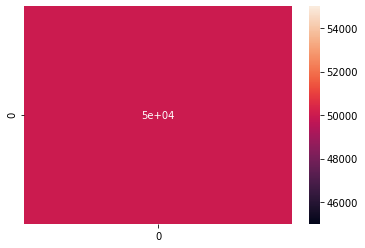

In [9]:
chkpath=os.path.join(path, 'DoS_unlabeled.csv')
df = pd.read_csv(chkpath)
df = df.replace([np.inf, -np.inf],1)
df = df.replace([np.nan],0)
del df['Dst Port']
del df['Timestamp']
df_pred1 =clf.predict(df)
df_pred2 = forest.predict(df)


predict=[]
for idx in range(len(df)):
  if df_pred2[idx]!= "Benign" or df_pred1[idx]==-1:
    predict.append(-1)
  else:
    predict.append(1)
#print(predict)

answer=[-1]*len(df)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_mat=confusion_matrix(answer,predict)
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

# check accuracy
print('정확도 :', metrics.accuracy_score(answer,predict))